In [70]:
# The normal imports
import numpy as np
from numpy.random import randn
import pandas as pd

# Import the stats library from numpy
from scipy import stats

# These are the plotting modules adn libraries we'll use:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Command so that plots appear in the iPython Notebook
%matplotlib inline

In [71]:
# Again seaborn comes with a great dataset to play and learn with
df_flight = sns.load_dataset('flights')
df_flight.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [72]:
df_flight = df_flight.pivot('month','year','passengers')
df_flight

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


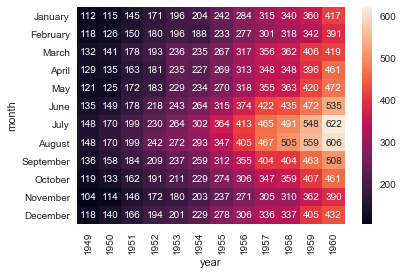

In [73]:
# This dataset is now in a clear format to be dispalyed as a heatmap
sns.heatmap(df_flight, annot=True, fmt="d")

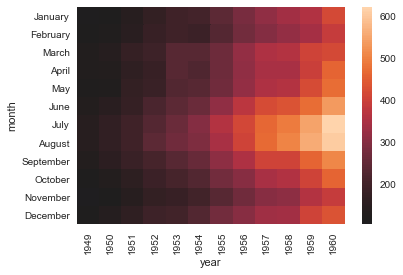

In [74]:
# We can choose our own 'center' for our colormap
sns.heatmap(df_flight,center=df_flight.loc['January',1950])

In [75]:
yearly_flights = df_flight.sum()
yearly_flights

year
1949    1520
1950    1676
1951    2042
1952    2364
1953    2700
1954    2867
1955    3408
1956    3939
1957    4421
1958    4572
1959    5140
1960    5714
dtype: int64

In [76]:
# Since yearly_flights is a weird format, we'll have to grab the values we want with a Series, then put them in a dframe
years = pd.Series(yearly_flights.index.values)
years

0     1949
1     1950
2     1951
3     1952
4     1953
5     1954
6     1955
7     1956
8     1957
9     1958
10    1959
11    1960
dtype: int64

In [77]:
years = pd.DataFrame(years)
years.head()

,0
0,1949
1,1950
2,1951
3,1952
4,1953


In [78]:
flights = pd.Series(yearly_flights.values) 
flights = pd.DataFrame(flights)
flights.head()

,0
0,1520
1,1676
2,2042
3,2364
4,2700


In [79]:
# Make the dframe and name columns
year_dframe = pd.concat((years,flights),axis=1)
year_dframe.columns = ['Year','Flights']
year_dframe.head()

,Year,Flights
0,1949,1520
1,1950,1676
2,1951,2042
3,1952,2364
4,1953,2700


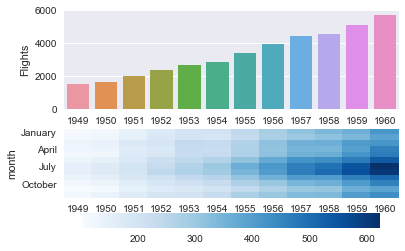

In [80]:
f, (axis1,axis2) = plt.subplots(2,1)

# Create the heatmap on bottom
sns.heatmap(df_flight,cmap='Blues',ax=axis2,cbar_kws={"orientation": "horizontal"})

# Create the bar plot on top
sns.barplot('Year',y='Flights',data=year_dframe, ax = axis1)


In [82]:
flight_dframe

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


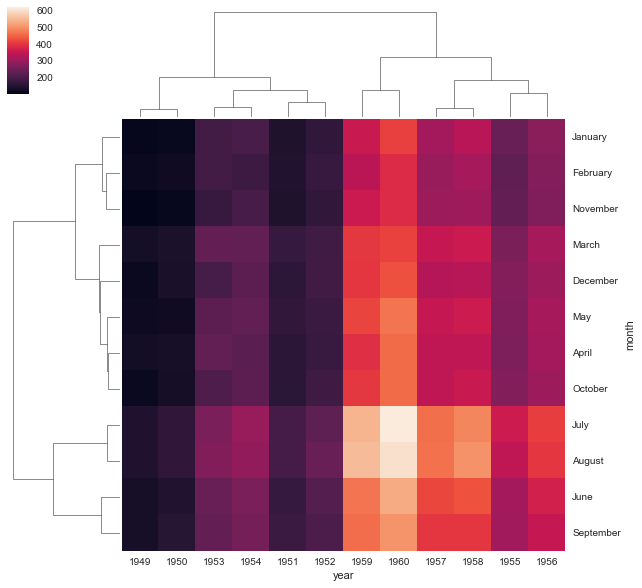

In [83]:
# Finally we'll learn about using a clustermap

# Clustermap will reformat the heatmap so similar rows are next to each other
g = sns.clustermap(flight_dframe)

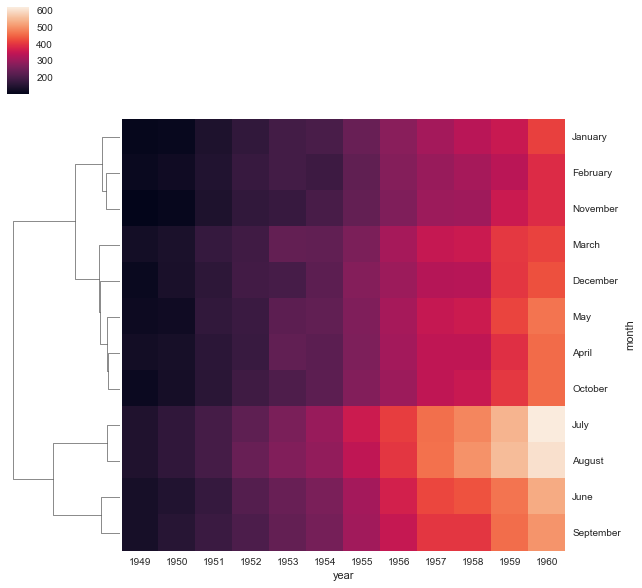

In [84]:
sns.clustermap(flight_dframe,col_cluster=False)

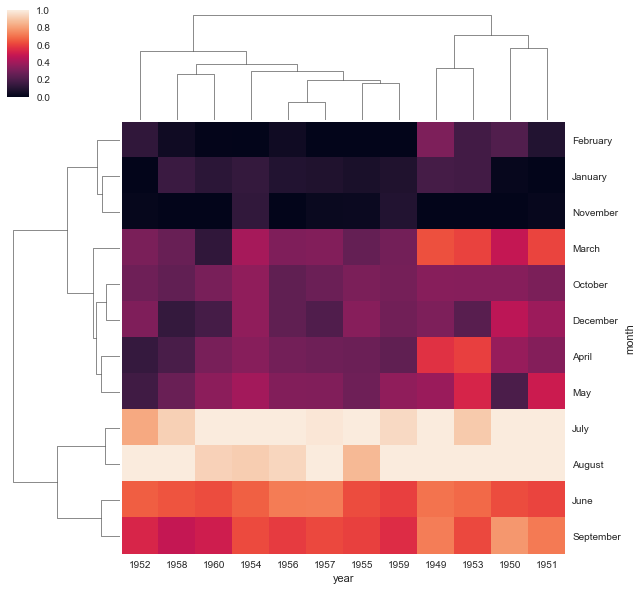

In [85]:
# Since the number of flights increase every year, we should set a standard scale

sns.clustermap(flight_dframe,standard_scale=1) # standardize by columns (year)

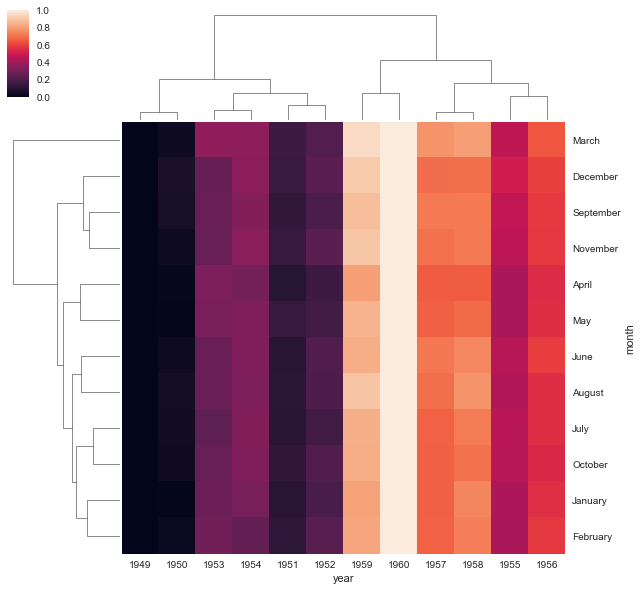

In [86]:
# Since the number of flights increase every year, we should set a standard scale

sns.clustermap(flight_dframe,standard_scale=0) # standardize by rows 

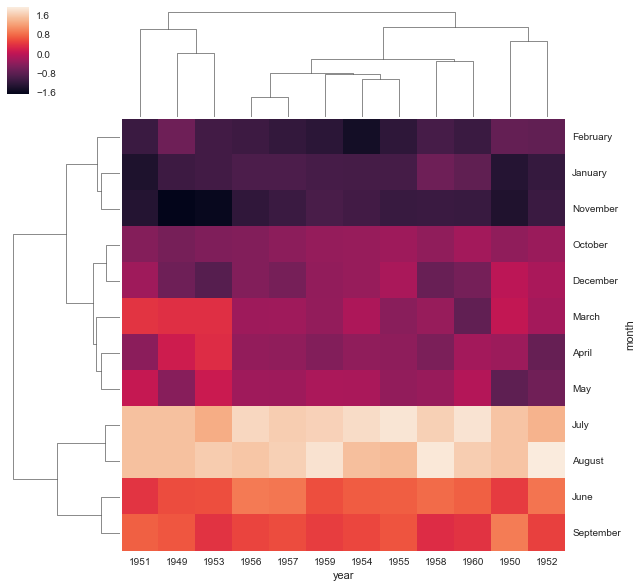

In [87]:
# Finally we can also normalize the rows by their Z-score.
# This subtracts the mean and devides by the STD of each column, then the rows have amean of 0 and a variance of 1

sns.clustermap(flight_dframe,z_score=1)

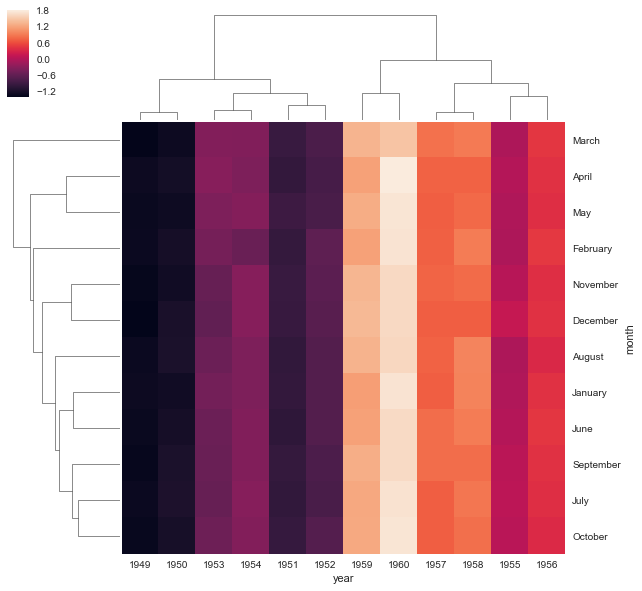

In [88]:
# Finally we can also normalize the columns by their Z-score.
# This subtracts the mean and devides by the STD of each column, then the rows have amean of 0 and a variance of 1

sns.clustermap(flight_dframe,z_score=0)